In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 01. 一個資料夾的所有檔案

一個方便簡單, 大家也常用的照片整理, 是把圖片都放到一個資料夾中。檔案就是類別, 多張同個類別可能就標個 1, 2, 3。

現在我們想把某個資料夾檔案名稱, 做成一個 list。這用 `os` 套件中的 `listdir` 就可以做到。

In [2]:
import os

In [32]:
folder = 'images/myna/'

In [33]:
os.listdir(folder)

['javan_myna01.jpg',
 'javan_myna02.jpg',
 'javan_myna03.jpg',
 'common_myna03.jpg',
 'common_myna02.jpg',
 'common_myna01.jpg',
 'crested_myna02.jpg',
 'crested_myna03.jpg',
 'crested_myna01.jpg']

真的可以! 所以我們就把這放入一個 list 中。

In [34]:
egg = os.listdir(folder)

### 02. 用 `PIL` 套件把一張圖讀進來

In [7]:
from PIL import Image

假設我們要 3 號照片。

In [35]:
im = Image.open(folder + egg[3])

我們可以看一下照片的樣子! (會開另一個視窗)

In [12]:
im.show()

### 03. 轉成 `numpy array`

In [13]:
img = np.array(im)

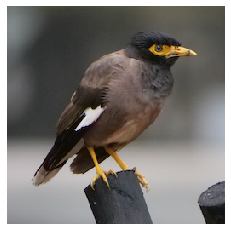

In [25]:
plt.axis('off')
plt.imshow(img)

我們順便利用這個機會好好研究一張圖是怎麼存在電腦的。

In [15]:
img.shape

(256, 256, 3)

所以就是有三張 $256 \times 256$ 的矩陣。第 $0$ 張是長這樣。

In [19]:
img[:,:,0]

array([[104, 106, 105, ...,  83,  84,  83],
       [106, 106, 106, ...,  81,  81,  80],
       [105, 108, 109, ...,  81,  81,  81],
       ...,
       [136, 136, 135, ...,  17,  19,  25],
       [134, 135, 134, ...,  19,  20,  26],
       [133, 132, 133, ...,  21,  21,  25]], dtype=uint8)

In [20]:
img_r = img[:,:,0]
img_g = img[:,:,1]
img_b = img[:,:,2]

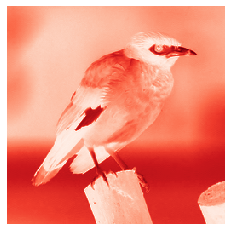

In [22]:
plt.axis('off')
plt.imshow(img_r, cmap='Reds')

三張一起顯示, 看看 RGB 三個 channel 分別長什麼樣子。

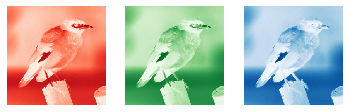

In [23]:
plt.subplot(131)
plt.axis('off')
plt.imshow(img_r, cmap='Reds')

plt.subplot(132)
plt.axis('off')
plt.imshow(img_g, cmap='Greens')

plt.subplot(133)
plt.axis('off')
plt.imshow(img_b, cmap='Blues')

### 04. 所有的數據分輸入輸出讀進來

其實講到這裡, 後面應該可以當練習了。不過我們還是略略示範一下, 整個讀進來的流程。現在我們的 `egg` 這個 list, 是全部的檔名, 而我們又發現檔名前面就是各種八哥的名稱。假設我們想做的輸出是:

* `javan_myna` (白尾八哥): 1
* `common_myna` (家八哥): 2
* `crested_myna` (八哥, 俗稱土八哥, 台灣原本只有這一種): 3

於是我們做個「八哥字典」。

In [28]:
myna = {'javan_myna':1, 'common_myna':2, 'crested_myna':3}

當然大家都會發現, 檔名後面的編號, 結尾的 `.jpg` 我們是不要的。一般你想找出字串要符合某些情況的, 最通用強力的工具, 是個叫 regular expression 的語法。而 Python 中有個 `re` 套件可以實行!

但是我們又發現, 原來的檔案很規律 (這要感謝自己在命名的時候很有系統), 於是我們其實可以去掉最後的 6 個字元就好!

In [29]:
spam = egg[3]

In [30]:
spam

'common_myna03.jpg'

In [31]:
spam[:-6]

'common_myna'

這樣子是不是很容易就找到我們要的了?

In [36]:
x = []
y = []

for fname in egg:
    # 照片本身放入 x 中
    im = Image.open(folder + fname)
    img = np.array(im)
    x.append(img)
    
    # 答案放入 y 中
    y.append(myna[fname[:-6]])

我們來試試看裡面資料長什麼樣。

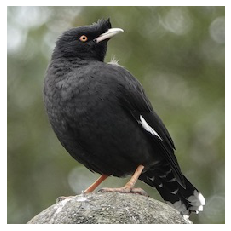

In [41]:
plt.axis('off')
plt.imshow(x[6])

In [42]:
y[6]

3

果然出現一隻八哥的照片, 答案也的確是 3, 就是八哥!

#### One More Thing

如果可以, 其實我們更愛把 x, y list 變成 numpy array。要達成當然很容易, 就像這樣。

In [43]:
x = np.array(x)
y = np.array(y)

### 05. 存檔

而 Python 有個有名的、沒有學就好像沒有學過 Python 一様的「完完全全保持資料型態」的存取法。比如說，我們一個 numpy array，我們可以打包存起來，下次讀回來就是原來的 nympy array!

這個炫炫的方法就叫 `pickle`!

In [44]:
import pickle

In [50]:
f = open("myna_input.pickle", 'wb')
pickle.dump(x, f)
f.close()

In [51]:
f = open("myna_output.pickle", 'wb')
pickle.dump(y, f)
f.close()

我們讀進來試試。

In [52]:
f = open("myna_input.pickle", 'rb')
X = pickle.load(f)
f.close()

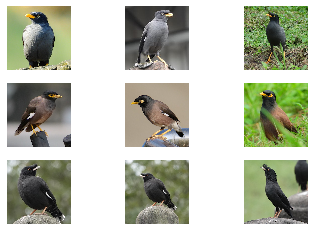

In [55]:
for n in range(len(X)):
    plt.subplot(3,3,n+1)
    plt.axis('off')
    plt.imshow(X[n])

當然, 你就可以把做好的「八哥數據庫」存到一個合適的地方 (比如我們移到 data/myna) 之下。